In [1]:
import numpy as np
import scipy.integrate as spi

from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
data1 = pd.read_csv("D:\\DEBADES SIR;S PAPERS\\FORTRAN TOV Code\\aghto300m0.7.excel.csv")
df1=pd.DataFrame(data1)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print(df1)

    1.00E-01  1.53E-02  0.00E+00  1.44E+01   9.14E-03
0        0.2    0.0306       0.0      28.8     0.0234
1        0.3    0.0459       0.0      43.3     0.0787
2        0.4    0.0612       0.0      57.7     0.2110
3        0.5    0.0765       0.0      72.2     0.4510
4        0.6    0.0918       0.0      86.8     0.8260
5        0.7    0.1070       0.0     101.0     1.3600
6        0.8    0.1220       0.0     116.0     2.0800
7        0.9    0.1380       0.0     131.0     2.9800
8        1.0    0.1530       0.0     146.0     4.0700
9        1.1    0.1680       0.0     161.0     5.3800
10       1.2    0.1840       0.0     176.0     6.9300
11       1.3    0.1990       0.0     192.0     8.7500
12       1.4    0.2140       0.0     207.0    10.9000
13       1.5    0.2300       0.0     223.0    13.3000
14       1.6    0.2450       0.0     238.0    16.0000
15       1.7    0.2600       0.0     254.0    19.1000
16       1.8    0.2750       0.0     271.0    22.5000
17       1.9    0.2910      

In [4]:
new_df1 = pd.DataFrame()
new_df1['Pressure (GeV/fm³)'] = df1.iloc[:, 4] / 1000
new_df1['Energy density (GeV/fm³)'] = df1.iloc[:, 3] / 1000

print(new_df1)

    Pressure (GeV/fm³)  Energy density (GeV/fm³)
0             0.000023                    0.0288
1             0.000079                    0.0433
2             0.000211                    0.0577
3             0.000451                    0.0722
4             0.000826                    0.0868
5             0.001360                    0.1010
6             0.002080                    0.1160
7             0.002980                    0.1310
8             0.004070                    0.1460
9             0.005380                    0.1610
10            0.006930                    0.1760
11            0.008750                    0.1920
12            0.010900                    0.2070
13            0.013300                    0.2230
14            0.016000                    0.2380
15            0.019100                    0.2540
16            0.022500                    0.2710
17            0.026400                    0.2870
18            0.030600                    0.3040
19            0.0353

In [5]:
pressure_values1 = new_df1['Pressure (GeV/fm³)']
energy_density_values1 = new_df1['Energy density (GeV/fm³)']
interpolated_function1 = interp1d(pressure_values1,energy_density_values1, kind='cubic')


In [6]:
len(pressure_values1)

99

In [7]:
def tovrhs(dep_variables,x):#This function takes two parameters "initial" and "x" that represent the inputs. 
    p=dep_variables[0] #Here the first element in the initial list is assigned to variable "pres"
    𝑚=dep_variables[1] #Here the second element in the initial list is assigned to variable "mass"
    𝛼=41.325 #alfa= (M_solar*c**2/R_s**3) in units of MeV/fm^3
    𝜖=eos(p) #Here an equation of state is called as a function of pressure and is assigned to the energy density 
    one=-0.5*𝜖*m*(1+(p/𝜖))*(1+(4*np.pi/𝛼)*(p/m)*x**3)/(x**2-m*x) #RHS of the TOV equation dp/dr
    two=4*np.pi*x**2*𝜖/𝛼 # RHS of the TOV Equation dm/dr
    f=[one,two] #it stores the calculated values from the previous lines into a list f. 
    return f

In [8]:
def eos(p):
    print(p)
    if p<=2.34*(10**(-5)):
        p=2.34*(10**(-5))
    return float(interpolated_function1(p))

In [9]:
print(interpolated_function1(pressure_values1))

[0.0288 0.0433 0.0577 0.0722 0.0868 0.101  0.116  0.131  0.146  0.161
 0.176  0.192  0.207  0.223  0.238  0.254  0.271  0.287  0.304  0.321
 0.338  0.355  0.372  0.39   0.408  0.426  0.444  0.463  0.481  0.5
 0.519  0.538  0.557  0.577  0.596  0.616  0.636  0.656  0.677  0.697
 0.718  0.739  0.76   0.781  0.803  0.825  0.847  0.869  0.891  0.914
 0.937  0.959  0.983  1.01   1.03   1.05   1.08   1.1    1.13   1.15
 1.17   1.2    1.23   1.25   1.28   1.3    1.33   1.35   1.38   1.41
 1.43   1.46   1.49   1.52   1.54   1.57   1.6    1.63   1.66   1.68
 1.71   1.74   1.77   1.8    1.83   1.86   1.89   1.92   1.95   1.98
 2.01   2.04   2.08   2.11   2.14   2.17   2.2    2.24   2.27  ]


In [10]:
def tsolve(p0,xfinal): # This function takes two parameters "pcent" that raprents central pressure and "xfinal" is final value of independent parameters.
    𝛼=41.325
    
    𝜖=eos(p0)
    
    dx=0.00025 #This represents the step size in independent variables.
    
    initial=p0,4*np.pi**𝜖*dx**3/(3*𝛼) #This line caculates the initial conditions of differential equations.It assigns a tuple to the variable "initial" containing the "central pressure(pcent)" and "initial mass((4 * np.pi ** eden * dx ** 3 / (3 * alfa)))
    X=np.arange(dx,xfinal,dx) #This line generates an array using np.arange()
    
    tov_sol=spi.odeint(tovrhs,initial,X) #It solves the ordinary differential equations using the "tovrhs" function,initial conditions "initial" and array of values "x".
    
    rstar=0 #We initialize "rstar","mstar","count" with value 0. They are used to store values related to some physical quantities.By setting it zero initially,it ensures that variables are initialized before any calculations or updates are performed
    mstar=0
    count=0
    
    m=[] # These are the three empty lists are created to store updated values of rstar,mstar and i
    r=[]
    p=[]
    
    for i in tov_sol[:,0]: #This starts a loop that iterates over the values in the first column ([:, 0]) of the tov_sol array.Each value represent the pressure.
        
        if i>1.e-5:
            count=count+1
            rstar=rstar+2.95*dx
            r.append(rstar) #It appends the current value of rstar to the list r.It stores the values of the radial distance.
            mstar=tov_sol[count,1] #This line assigns the value from tov_sol array at index "[count,1]" to the variable "mstar".It represents the mass at thecurrent iteration.
            m.append(mstar) #It appends the current value of mstar to the list m.It stores the values of the mass.
            p.append(i)#It appends the current value of "i" to the list w.It stores the values of the pressure.
            
    return rstar,mstar,r,m,p #Finally the values of "rstar","mstar","r","m","w" are returned as a tuple.

F=tsolve(0.15,10) #It assigns the returned tuple from "tsolve" to the variable F,i.e.,F becomes a tuple containing the values returned by the "tsolve" function.


0.15
0.15
0.14999999999924582
0.1499999999984913
0.14999999245316525
0.14999998668804115
0.14999999811215967
0.14999999757006766
0.1499999925912984
0.14999999224574462
0.14999998622825791
0.14999998581071033
0.14999997876278012
0.14999997825686742
0.14999997015955624
0.1499999695776644
0.1499999604128904
0.14999995976886057
0.14999994952245435
0.1499999488276947
0.14999993748889323
0.14999993675230558
0.1499999243129017
0.14999992354139222
0.14999990999504434
0.1499999091940152
0.14999989453574705
0.1499998937094768
0.14999987414293534
0.14999987425498756
0.14999985367528837
0.1499998536616531
0.14999983159338193
0.14999983158490243
0.14999982454173777
0.14999982454120137
0.14999981736422355
0.14999981736396492
0.14999981004511717
0.14999981004488272
0.1499998019188481
0.1499998019185897
0.1499997936231274
0.1499997936228863
0.14999970133162627
0.14999970356679598
0.14999970133162627
0.14999959082758602
0.14999946154075847
0.14999844201719426
0.1499984442523452
0.14999844201719426
0.14

In [11]:
print(F[0],F[1])

12.242499999995879 1.913487250017095


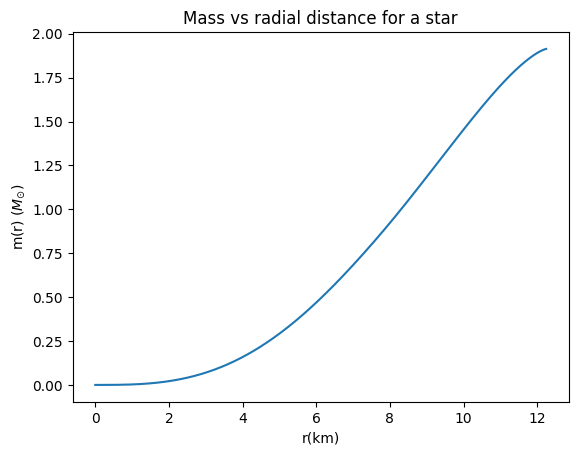

In [12]:
plt.plot(F[2],F[3])
plt.xlabel('r(km)')
plt.ylabel('m(r) ($M_{\odot}$)')
plt.title('Mass vs radial distance for a star' )
plt.show()

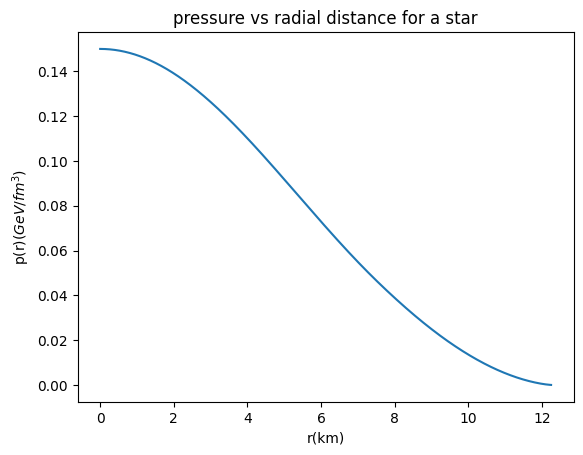

In [13]:
plt.plot(F[2],F[4])
plt.xlabel('r(km)')
plt.ylabel('p(r)($GeV/fm^{3}$)')
plt.title('pressure vs radial distance for a star' )
plt.show()

In [14]:
def M_R(imax):
    #imax=len(pressure_values) # It represents the maximum number of iterations in the subsequent loop.
    p0=np.zeros(imax) # Here a numpy array pc of desired size("imax")  is created and its all elements are initially set to zero.This array will store the values of pc during the iteration of the loop.
    M=np.zeros(imax)
    R=np.zeros(imax)
    E0=np.zeros(imax)
    for i in range(imax):
        p0[i]=pressure_values1[i] # in each iteration this line calculates the value of pc[i] based on the index i.
        E0[i]=interpolated_function1(pressure_values1[i])
        
        
        R[i]=tsolve(p0[i],10)[0]
        # This line calculates the radius at index i by calling the tsolve function with pc[i] as the central pressure and 10 as the xfinal value. The tsolve function returns a tuple containing (rstar, mstar, r, m, w). Since the radius is stored at index 0 within the tuple, [0] is used to access that value. The calculated radius is then assigned to radius[i].
        M[i]=tsolve(p0[i],10)[1]
        #  These lines utilize the tsolve function to calculate the radius and mass for each pc[i] value within a loop. The resulting values are stored in the radius and mass arrays, respectively, at the corresponding indices i.
    return p0,R,M,E0 #The function will return these three arrays as a tuple.Each array contains the values calculated during the loop and order of the arrays in the tuple mathches the order in which they are listed in the return statement.

T=M_R(len(pressure_values1))

2.34e-05
2.34e-05
2.339999999266547e-05
2.339999999266858e-05
2.3399999985337158e-05
2.3399999985340265e-05
2.339992670218768e-05
2.3399989768011566e-05
2.3399893459842996e-05
2.339991232706794e-05
2.3399816079805408e-05
2.339982520734529e-05
2.3399721944885452e-05
2.339972580231028e-05
2.33996121184364e-05
2.3399612582165275e-05
2.3399486716554915e-05
2.3399484797908273e-05
2.3399345737017683e-05
2.339934205044964e-05
2.339918916039217e-05
2.3399184108737937e-05
2.3399016967569477e-05
2.339901082967425e-05
2.339882914268668e-05
2.3398822119711824e-05
2.339862567307317e-05
2.3398617914961178e-05
2.339813490709333e-05
2.3398143943437778e-05
2.339761512851115e-05
2.33976144966635e-05
2.339701890159819e-05
2.3397019004528304e-05
2.3395566206250893e-05
2.339557266807538e-05
2.339379506608354e-05
2.3393806244330153e-05
2.3391718810087092e-05
2.3391727409459554e-05
2.3384510063934423e-05
2.338465040428327e-05
2.3374822156590356e-05
2.337501476016514e-05
2.3362897015853748e-05
2.3363015381996

0.0008259999999999999
0.0008259999999760087
0.000825999999952032
0.0008259997601852818
0.0008259999376547849
0.0008259990865484172
0.0008259992315933602
0.0008259983532189652
0.0008259984268298618
0.0008259974741585645
0.0008259975032367628
0.0008259964488139447
0.0008259964480583923
0.0008259952770161968
0.000825995254972417
0.0008259939585646414
0.0008259939205919392
0.0008259924932803521
0.0008259924429496042
0.0008259908810177931
0.0008259908208240142
0.000825989121661458
0.0008259890534152048
0.0008259872151198231
0.0008259871401759932
0.0008259851613198802
0.0008259850807185002
0.0008259829602028288
0.0008259828747594638
0.000825980611720823
0.0008259805220867563
0.000825977452500202
0.0008259774743567563
0.0008259742960465659
0.0008259742935449098
0.0008259709179571761
0.0008259709163416122
0.0008259641418252126
0.0008259641402357845
0.0008259566366502631
0.0008259566392186543
0.0008259484013137838
0.0008259484049315708
0.000825935049974394
0.0008259350651812959
0.00082592008227

-0.0007582871374021882
-0.0008400467663248084
-0.0010157155466542687
-0.0010157609303379346
-0.0011993148659448075
-0.0011994273784327871
-0.001392042458925095
-0.0013921188125380203
-0.0015946188308991174
-0.0015946633075141557
-0.0018077097991330087
-0.0018077391880990006
-0.0020875489009918274
-0.0020875898093676835
-0.002385578760457557
-0.0023856308674116908
0.00298
0.00298
0.0029799999999607575
0.0029799999999215324
0.0029799996076667573
0.0029799998516817717
0.0029799978831942736
0.0029799981954954547
0.0029799961416813337
0.0029799962959819607
0.002979994055157743
0.0029799941081374666
0.0029799916183914058
0.0029799916030113743
0.0029799888305188124
0.0029799887662216983
0.0029799856910073534
0.0029799855900562357
0.002979982199443513
0.0029799820700323405
0.0029799783555024824
0.0029799782033656796
0.002979974158928831
0.002979973988231871
0.002979969609520415
0.002979969423382533
0.0029799647071157434
0.0029799645079323974
0.0029799594515844303
0.0029799592412347183
0.002979

0.0002914632921787095
0.000272693543377723
0.00025429596058902264
0.00023626695194085622
0.000218602445024454
0.00019689685326402463
0.00019689828042371207
0.00019863105761706488
0.00021457013007401688
0.00021457013327136096
0.00021457013007401688
0.0002105568580121302
0.00020656265921273936
0.00020258750373639906
0.00019863146136798546
0.00019158857843367557
0.00019158858128856787
0.00019158857843367557
0.00018460856749480875
0.00018460843312971268
0.00017769291281180798
0.00017769265423286246
0.0001708436788362887
0.00016406371021539655
0.00015735634466333692
0.00014802404652242813
0.0001480240487281583
0.00014802404652242813
0.00013885467637965397
0.00013885457582053993
0.00012986061573382675
0.00012986036573447778
0.00012105509757587445
0.00011245193480749398
0.00010198972582006876
9.189285622600545e-05
8.21870900707351e-05
7.289589128291253e-05
6.403867643525698e-05
5.563060726715971e-05
4.505600497411293e-05
4.5056005645499723e-05
4.505600497411293e-05
4.5056291090191045e-05
3.53

0.004431117961145906
0.004431117958386147
0.004280812173319721
0.004280812162669188
0.004130164229397551
0.004130164216884469
0.0039793377789062
0.003979337783973737
0.0038284973881778997
0.0038284976238830756
0.0036778100859849393
0.0036778100376605866
0.003397454274392737
0.0033974526426719114
0.0031193126936897774
0.0031193093202748676
0.0028444756067010765
0.002844475085977426
0.002574031297438892
0.0025740428665240508
0.0025831482485828843
0.0025831592495046446
0.002791851091687007
0.0027918512228951244
0.0027393997023837566
0.002739399563357199
0.0026871280667007994
0.002687128108665952
0.0026350449670123005
0.0026350449648811225
0.0025831582788566508
0.0025831582765627682
0.002480007060026546
0.0024800070396643454
0.0023777402612502135
0.0023777402423640287
0.0022764239930268605
0.0022764240116602257
0.002176124521527057
0.002176124516685419
0.002076907688963378
0.0020769076823467965
0.0019788388986033867
0.0019788390092011793
0.001814109266552575
0.00181411075228739
0.001653255

0.0010005669121311458
0.000918101961754096
0.0009181036476873574
0.000837923844822777
0.0008379232639869772
0.0007600750106009657
0.0007600781631335602
0.000684630387694843
0.0006846450040071258
0.0007009106478989802
0.0007009185190263866
0.0007481265018397524
0.0007481266633517499
0.0007362345482268184
0.0007362344729595078
0.000724402027859674
0.0007244020437617744
0.0007126298834177526
0.0007126298985547596
0.0006892686585079042
0.0006892687244476801
0.000666155868290023
0.0006661558114175355
0.0006432965664699688
0.0006432965079540335
0.0006206965914724387
0.0006206965691003326
0.0005983621362525019
0.0005983621136115705
0.0005317854585057353
0.0005317846595887991
0.00046794587467286364
0.00046794486839801385
0.0004070391988528121
0.0004070381281025588
0.0003492366115663448
0.0003492175345445858
0.0003703238842319771
0.00037031868805302755
0.0003995957929481232
0.00039959568231620444
0.0003922021271146222
0.0003922022983767522
0.000384858242172806
0.0003848581749801935
0.0003775634

0.0007097779556954237
0.0006740103114076425
0.0006740106684021053
0.0006388528331672891
0.0006388524427105041
0.0006043229390717579
0.0006043225351879659
0.000570442223268401
0.0005704420279530716
0.0005372336090379407
0.0005372334134700842
0.0004633761031393769
0.00046337358357360914
0.0003934979327817968
0.0003934892004305099
0.0004101448648288798
0.0004101420814714301
0.0003592914144298435
0.0003592818717717131
0.0003722121690528528
0.0003722080348357087
0.0003355868384139869
0.00033559280114199303
0.00034244126314483716
0.0003424444010746258
0.00031354717028508276
0.00031354596006905326
0.00028550466402278517
0.0002855051441911849
0.000258308969604599
0.00025830886039060783
0.00023193951222698814
0.00023193947866032773
0.00020637569743309778
0.00020637570212559534
0.00015756738188914493
0.00015768734539592903
0.00017535863085577482
0.00017538266289402818
0.0002000751654579065
0.00020007530159211218
0.00019382436606337356
0.00019382452997918623
0.00018762374003642614
0.0001876239007

0.010450194682946381
0.010450215069455975
0.01050627211991078
0.010506285437986818
0.011010111430691668
0.011010111431780552
0.010883827113718629
0.010883827113197632
0.010757757879446892
0.010757758001201276
0.010631906850820381
0.010631907062843605
0.010506278480526998
0.010506278207256678
0.010380876193601521
0.010380876136697793
0.01013077556203951
0.010130775562061349
0.009881660544573987
0.009881660564482178
0.009633600487663535
0.009633600515108018
0.00938667897929077
0.009386678973058157
0.009140993661481637
0.00914099361286111
0.00869260286282303
0.00869260203896071
0.00824959778911957
0.008249567190852812
0.008415146301851221
0.008415140467076076
0.008139979063838305
0.008139967900117295
0.008210409639568955
0.00821040478974421
0.008007002673280326
0.008007003870305403
0.007805000977603447
0.0078050007106287705
0.007604450122803818
0.007604450135914742
0.0074053992069264465
0.007405399236469204
0.007011946060287665
0.007011946537366687
0.006624866149217959
0.00662487402372410

0.010668024308113873
0.01066802739521834
0.010078247810635602
0.010078348767151581
0.010078247680472031
0.010078356524854276
0.010549439441950794
0.010549440527974805
0.01043117700419468
0.010431176052988465
0.010313235735480496
0.010313236023271655
0.010195623436427477
0.010195623434846045
0.01007834193939451
0.010078341937300637
0.009844790276971336
0.009844790252962489
0.00961262390870826
0.009612623829389353
0.009381896280132225
0.009381896178546373
0.009152671292334663
0.00915267117000756
0.008925022822267925
0.008925022676891096
0.008475243988897256
0.008475237645704395
0.008032841636573817
0.00803277201781717
0.00823644346422973
0.008236432025477901
0.00842730402844141
0.008427303805631349
0.008379455154152546
0.008379455498184073
0.008331693703098806
0.008331693565892811
0.008284018734480234
0.00828401873441801
0.008236431721112747
0.008236431721148149
0.008141523897448695
0.008141523897829139
0.008046975353139248
0.008046975354326818
0.007952790968162983
0.007952790969556176
0

0.0031899525816183752
0.0028382898852606546
0.002838283169421278
0.002502537801663745
0.002502558314362973
0.0025047562212002087
0.0025047756634552485
0.0027703108355448137
0.002770311041766187
0.002702970597052853
0.0027029706272117303
0.0026362650523882856
0.0026362651043618426
0.002570197668261736
0.0025701977102632035
0.0024399905444116156
0.002439990658275973
0.002312377109416172
0.0023123767497807398
0.002187383980966423
0.002187383616207426
0.002065038757833308
0.002065038508683712
0.0019453679410073312
0.001945368064574059
0.0017317299397404521
0.0017317338759688695
0.0015274720974157406
0.0015274710902475435
0.0013327602419041776
0.0013327522136499866
0.0013660766085334707
0.001366072084835773
0.0012112598392876816
0.0012112615581399955
0.001063121640608565
0.001063134026605012
0.0010631218756666254
0.0010631352410092796
0.0011810973749441455
0.0011810976130858595
0.0011512020224855644
0.00115120191718753
0.001121575385205274
0.001121575399577443
0.0010922190485285605
0.001092

0.0586
0.058599999999753336
0.0585999999995066
0.05859999753217017
0.05859999675019282
0.05859999938267247
0.05859999930732759
0.05859999778724415
0.05859999773928027
0.05859999594621512
0.05859999586602889
0.05859999379381653
0.0585999936817629
0.05859999132107385
0.05859999118293575
0.05859998852648042
0.058599988367442866
0.05859998540989357
0.05859998523397649
0.05859998197142787
0.05859998178168246
0.05859997821122036
0.05859997800997789
0.0585999741293831
0.058599973918449996
0.058599969725999235
0.05859996950679713
0.05859996500112829
0.05859996477479295
0.05859995995481218
0.05859995972226373
0.058599954587080116
0.05859995434907349
0.058599946627355196
0.05859994666613217
0.05859993852937018
0.058599938525332636
0.058599929835832364
0.05859992983333223
0.058599927679735715
0.058599927679630924
0.05859992549713087
0.05859992549708637
0.0585999019185389
0.058599902791745484
0.0585999019185389
0.05859987496525157
0.05859984454898655
0.058599444669949104
0.05859944554314887
0.0585

0.00039757189392429683
0.00039756644169942586
0.0003532226203458646
0.0003532129461371448
0.0003619616449081971
0.00036195644755689695
0.00032752536634561124
0.0003275272772377939
0.00029427082992451037
0.0002942715815694937
0.0002621699990538789
0.0002621708973828848
0.0002311969194206676
0.00023119772563708532
0.0001824924896430245
0.00018251331489720963
0.00019436738442717795
0.00019437163488403436
0.00015915647403525195
0.00015923355787617226
0.00016364727159979916
0.0001637026226717707
0.000188130613665406
0.0001881313284998311
0.00018194206774755525
0.00018194194892261887
0.00017580447023578737
0.00017580461603218975
0.00016972075787146352
0.00016972089305093983
0.00015772148337911456
0.00015772203766435273
0.00014596428119465383
0.0001459636532650821
0.00013446844954898566
0.0001344677761048131
0.00012325939405050766
0.00012325902310004707
0.00011236414482066559
0.00011236375282012416
9.19692979739385e-05
9.196621139002569e-05
7.308142529627528e-05
7.307976130269925e-05
5.585892

0.056114891771975754
0.05561585036158155
0.05561585036439774
0.05511411624468781
0.055114116246881346
0.054609808231975636
0.054609808228123655
0.05410304601707106
0.05410304601596106
0.05359395024647045
0.05359395011111572
0.05308264133957779
0.053082640903113085
0.052262160637468184
0.05226216236514251
0.05143681674631323
0.05143681982691825
0.0506070736652486
0.05060707403532695
0.04977337041866672
0.049773370446095914
0.04893613778743337
0.04893613629073925
0.048095773204583706
0.04809576646567908
0.04725259338306175
0.047252597999381106
0.04640690410793663
0.04640690669338613
0.045558900983282066
0.04555890109597481
0.04370405497619655
0.043704160586630965
0.04439388088051711
0.044393894668233916
0.04322500281219819
0.04322507535337967
0.0432250026591309
0.04322508097893563
0.044160424543539155
0.04416042571954032
0.0439268083986675
0.04392680685842314
0.04369304007124057
0.043693040617386415
0.043459129985818114
0.04345912999054533
0.04322507807679977
0.043225078079687076
0.04275

0.06958912177859246
0.06846788009953465
0.06846786879638558
0.06731641574406692
0.06731640582869683
0.06613632979708585
0.0661363502188914
0.06492933680568942
0.06492936307684663
0.06518495888185588
0.06518497233879926
0.0642176447763463
0.06421764412668839
0.06323526144757875
0.06323526442301701
0.06223877920319178
0.06223877826884004
0.061229171475377306
0.06122915725343575
0.06020736963727275
0.06020736322341158
0.05917434408782
0.05917434146126713
0.058131015454591546
0.0581310131590451
0.056016982095856316
0.056017038035232114
0.0566109571876731
0.05661097445031843
0.05507406108143762
0.05507408505849332
0.05507406098269447
0.055074086957867814
0.05630485744193939
0.05630485788539597
0.05599808945140572
0.05599808882474781
0.055690689117594026
0.05569068934638057
0.05538268143107385
0.05538268143391611
0.05507408710940589
0.05507408711015198
0.05445522777835133
0.05445522778423963
0.05383428936866168
0.05383428934764213
0.05321145116118279
0.053211450372959844
0.05258688718500438


0.09540000000000001
0.09539999999957118
0.09539999999914217
0.09539999570909428
0.09539999329914346
0.09539999892663013
0.09539999869075923
0.0953999959004192
0.0953999957559456
0.09539999241834783
0.09539999222649702
0.09539998834090631
0.0953999880957156
0.09539998364913517
0.09539998335890532
0.09539997833993903
0.09539997801314612
0.09539997241310454
0.09539997205657588
0.09539996586894717
0.09539996548795653
0.09539995870781517
0.09539995830643155
0.09539995092999201
0.09539995051138755
0.09539994253569066
0.09539994210237203
0.09539993352506701
0.09539993307904257
0.09539992389823417
0.09539992344113442
0.09539991365527413
0.09539991318843899
0.09539989692575948
0.09539989700983227
0.09539987971801017
0.09539987970959783
0.09539986112068036
0.09539986111594098
0.09539985764544434
0.09539985764532317
0.09539985414025497
0.09539985414021165
0.09539981677266521
0.09539981819423325
0.09539981677266521
0.09539977502076895
0.09539972879947978
0.09539916839254942
0.0953991698141078
0.09

0.108
0.108
0.10799999999950195
0.1079999999990037
0.10799999501644765
0.10799999192407757
0.1079999987533646
0.10799999845315225
0.10799999518843617
0.10799999500325665
0.10799999108618728
0.10799999084825006
0.10799998628016802
0.10799998598115237
0.10799998074777163
0.10799998039686863
0.10799997448532307
0.10799997409219236
0.1079999674925838
0.10799996706506569
0.10799995976994323
0.10799995931411455
0.10799995131782722
0.10799995083838529
0.10799994213658216
0.10799994163719318
0.10799993222646874
0.10799993171003196
0.10799992158767825
0.10799992105651786
0.10799991022035002
0.10799990967635364
0.10799989812458544
0.10799989756930475
0.10799987783560255
0.10799987793838876
0.10799985690227348
0.10799985689214497
0.10799983423512378
0.10799983422959891
0.10799983035513436
0.10799983035501236
0.10799982644611943
0.1079998264460782
0.10799978493376838
0.10799978654309059
0.10799978493376838
0.10799973885474616
0.10799968812810669
0.10799907630645897
0.10799907791577061
0.1079990763

0.058169807976473
0.058169807521774405
0.057130118078734554
0.05713012443072085
0.055772600922169784
0.05577261793554866
0.056091381344097774
0.05609138955439856
0.05505590991178442
0.05505591373721211
0.05402407116392754
0.054024073784775015
0.052996250168760355
0.052996249447873796
0.05197281892189065
0.05197280726423601
0.050954095088942414
0.0509540809583469
0.049940384086902205
0.049940369713440264
0.04850738306931398
0.04850734462990638
0.04884475083371998
0.048844734262806555
0.047755599487605334
0.047755585918820814
0.0466730465209371
0.046673038410872246
0.04559705276007116
0.045597052724505954
0.044527439427706615
0.04452744833382195
0.04346392141573077
0.04346398259728966
0.04382571606666119
0.04382573455698593
0.04312664167501894
0.043126638871614074
0.042430131612219465
0.0424301326839906
0.041736209375268604
0.041736209466656876
0.04104488356022409
0.04104488363766344
0.03967018853972262
0.03967018626273998
0.03830657113536027
0.038306520152370745
0.038433168284189335
0.0

0.005735680950205235
0.005735680897624781
0.005039427850187263
0.005039412511666046
0.004380934978416343
0.004380826006349236
0.0046284655011724915
0.0046284386621374875
0.004956061530703358
0.004956061013295674
0.0048732846917404786
0.00487328544962651
0.004791088509965611
0.004791088217806241
0.0047094713052415645
0.004709471304055126
0.004628436678153598
0.004628436676572484
0.0044681219656908236
0.004468121898722287
0.004310158960913
0.0043101586433545985
0.004154561151798362
0.004154560735040625
0.0040013413982232324
0.0040013409452734055
0.0036500137512213543
0.0036500137902573285
0.003312080257088834
0.003312087662302678
0.0029877025076002557
0.0029877000232268855
0.0026769668545570825
0.002676969284304327
0.0023800009340210725
0.0023800244450401524
0.002380001505995601
0.0023800266640018083
0.0026164714643216952
0.0026164719198975613
0.0025565275488378903
0.002556527342575465
0.0024971368749785467
0.002497136899196854
0.002438302035239942
0.0024383020533609258
0.002322305143732

0.04768550031524318
0.04768549030756868
0.04699086125428504
0.04699085092864532
0.046299631004700734
0.04629962079531772
0.04498161857351316
0.04498157699932942
0.045350687167616796
0.04535066956840725
0.044407885759211625
0.044407909262413954
0.04457678790843858
0.04457679999031385
0.043806953962498354
0.04380697303636586
0.0430410944316721
0.04304109810795085
0.042279115359584535
0.04227911534262278
0.04152099595931908
0.04152099592786928
0.040016388046262015
0.04001638718516536
0.038527661119309026
0.03852761248612811
0.03871368769281616
0.03871365448207178
0.039754862264091494
0.03975486198596856
0.03949382353127614
0.039493823713382746
0.039233275388299176
0.03923327533122502
0.038973219773794476
0.03897321977366845
0.038713660032826315
0.038713660032657186
0.03819604021936044
0.038196040217590425
0.03768044082159826
0.037680440816005814
0.03716688754323329
0.03716688753673032
0.036655406856584666
0.03665540684951172
0.03614602597321814
0.0361460259655795
0.03288880967585597
0.032

0.135
0.135
0.13499999999933968
0.134999999998679
0.1349999933922663
0.1349999886395691
0.1349999983470757
0.13499999789430436
0.13499999353332437
0.13499999324873677
0.13499998798984178
0.13499998764016272
0.13499998148928405
0.1349999810609179
0.13499997400079966
0.1349999735049825
0.13499996551940255
0.13499996496848995
0.1349999560447966
0.13499995544893248
0.13499994557753772
0.13499994494462397
0.13499993411822675
0.13499993345438813
0.13499992166735197
0.13499992097737676
0.13499990822528166
0.1349999075129607
0.1349998909758118
0.1349998910696254
0.13499987372661623
0.13499987371518193
0.13499985515369523
0.134999855146444
0.13499984882543042
0.13499984882491026
0.1349998423778638
0.13499984237760432
0.13499983579802494
0.13499983579779076
0.13499982862525642
0.13499982862501053
0.13499982130000013
0.13499982129977312
0.13499973964634704
0.1349997416579999
0.13499973964634704
0.13499964154386565
0.13499952645259092
0.13499858680031324
0.13499858881194893
0.13499858680031324
0.1

0.151
0.151
0.15099999999923935
0.15099999999847832
0.15099999238833572
0.15099998655302344
0.15099999809594253
0.15099999754770102
0.1509999925265047
0.15099999217672
0.1509999861071196
0.1509999856848648
0.15099997857528963
0.15099997806400667
0.1509999698954027
0.15099996930755707
0.15099996006171468
0.15099995941124938
0.150999949073895
0.15099994837230485
0.1509999369325949
0.15099993618885005
0.15099992363851544
0.15099992285957553
0.15099990919222633
0.15099990838353555
0.15099989359415744
0.15099989276002765
0.1509998729827718
0.15099987309609664
0.15099985229098076
0.15099985227719262
0.15099982996447145
0.15099982995590774
0.1509998228640726
0.15099982286353517
0.15099981563738687
0.15099981563712833
0.15099980826849924
0.15099980826826476
0.1509998000771002
0.15099980007684097
0.15099979171510147
0.15099979171485942
0.15099969869766233
0.15099970094773318
0.15099969869766233
0.15099958734838598
0.1509994570950019
0.1509984322060577
0.15099843445610966
0.1509984322060577
0.15

-0.0017768743310737616
-0.0017768519636815294
-0.002046160014317591
-0.002046146745092107
-0.002297585737952
-0.002297576089043784
-0.0026366402069770973
-0.0026366144859904708
-0.0029469494310777745
-0.0029468933865223882
-0.0032325978402037063
-0.003232561109141717
-0.003497030338945225
-0.0034970046112436487
-0.003743036030758547
-0.003743018259003418
-0.003972941226058563
-0.0039729286462933415
-0.004270914349827808
-0.004270886319679465
-0.004545605783277218
-0.004545550608756116
-0.0048004726741831
-0.004800438444083392
-0.005038429496196959
-0.005038405544417138
-0.005261813588085045
-0.005261797242184848
-0.005472570395097322
-0.005472558935713227
-0.005753333299563791
-0.005753306500441464
-0.0060157018278805445
-0.006015647501231496
-0.006262671003168665
-0.006262637501178748
-0.006496778489646063
-0.006496755473276619
-0.006720059460459296
-0.006720044016229036
0.159
0.159
0.1589999999991854
0.15899999999837042
0.1589999918483807
0.15899998543486038
0.15899999796087283
0.158

0.0965348953328054
0.09653489785415166
0.09567202364200882
0.09567202166229331
0.09480922499003308
0.09480922650750467
0.09394650898304255
0.09394651999400061
0.09308394076366465
0.09308392388768548
0.09222148141250643
0.09222147807065258
0.09135923407135305
0.09135924188241512
0.09049729756140468
0.09049729770201316
0.08877472505815094
0.08877472281526333
0.08705485721353752
0.08705479194585512
0.0871934727248078
0.08719341939617493
0.08845825743907014
0.08845825685036598
0.08814188667083886
0.0881418872588822
0.0878256211915975
0.0878256210042415
0.08750946483733588
0.08750946483660914
0.08719342546440748
0.08719342546395903
0.08656172357792713
0.08656172357344483
0.08593056756624327
0.08593056755304464
0.08530000845339472
0.08530000843994603
0.08467009606626662
0.08467009605354872
0.08404087897435075
0.08404087896236333
0.08077943778352845
0.08077938292098695
0.08151082630477977
0.08151080768647359
0.07899555476849017
0.07899547679590994
0.07967501503090786
0.07967498047153833
0.081

0.013018094018937172
0.012897465639656342
0.012897465620578155
0.012777343411230727
0.012777343415210557
0.012657729646058392
0.012657729650069022
0.012420034190116806
0.012420034222695614
0.01218438859931479
0.01218438861993959
0.011950795602002729
0.011950795554628095
0.01171925148940553
0.011719251483411134
0.011489746961143913
0.01148974695914773
0.0112622669646543
0.011262266961893279
0.010285318149371432
0.01028539303394343
0.010579453697270412
0.010579460965627705
0.009914542247445632
0.009914720400164086
0.010109554723548091
0.010109620469160125
0.010484781003906405
0.010484781961174377
0.010390460164650173
0.010390458930440884
0.010296490271360247
0.01029649070356082
0.01020287675358102
0.010202876750624455
0.01010961678815168
0.010109616785360574
0.0099241590885559
0.009924159060647305
0.009740120806637347
0.009740120723368053
0.009557509194826392
0.009557509106760762
0.009376335540153517
0.009376335452402304
0.00919661476526862
0.009196614677421819
0.008533690624884302
0.008

0.193
0.193
0.1929999999989393
0.1929999999978781
0.19299998981122032
0.192999981418032
0.19299999745121346
0.19299999667542758
0.19299999021079253
0.19299998968389143
0.19299998182857128
0.1929999812211694
0.19299997199472688
0.19299997128239518
0.19299996066612554
0.19299995986201976
0.19299994783597138
0.1929999469561418
0.1929999335041047
0.1929999325621092
0.19299991767153246
0.19299991667808233
0.19299990033927822
0.19299989930274772
0.19299988150816605
0.1929998804351407
0.1929998611788188
0.19299986007453468
0.19299983236350812
0.19299983252542197
0.19299980316298054
0.19299980314361195
0.1929997715029044
0.19299977149151593
0.1929997630779263
0.19299976307741448
0.1929997545268514
0.19299975452662785
0.19299974582621987
0.1929997458260146
0.19299973557909175
0.19299973557882755
0.19299972513012473
0.19299972512987015
0.19299960952595593
0.19299961240187422
0.19299960952595593
0.19299947242039206
0.19299931322012068
0.19299811678336726
0.1929981196592633
0.19299811678336726
0.1

0.06595129655216307
0.06626276475830604
0.06626278495908847
0.06522865676609728
0.06522867088773462
0.06420180508426321
0.06420180490037967
0.06318231386770999
0.06318231346809881
0.062170359992948065
0.06217035531661917
0.06093850131861262
0.0609384714411183
0.05971845103631636
0.05971843549261148
0.058510426278512655
0.05851042722948296
0.057314565296839204
0.05731457198134752
0.05613095256874846
0.05613097170593967
0.05495974204340639
0.054959745495988394
0.05380102670332657
0.05380102623064325
0.052654960046891255
0.05265495226205187
0.050311685269205736
0.05031153527203396
0.05144911190496712
0.0514490929593308
0.050257788138389346
0.050257764098254026
0.05046818967330812
0.050468175715609416
0.04949711286103625
0.04949710268118941
0.048535872493077094
0.048535854985936704
0.047584387705495106
0.04758435552237694
0.04777994402727646
0.047779918544772204
0.04838417995907118
0.04838417951750412
0.04823274959519172
0.048232749331482014
0.04808156414506934
0.04808156385633845
0.047779

0.09839022299103628
0.09839021981544885
0.09796669969397444
0.09796669968472539
0.09754368602618611
0.09754368602186747
0.09669921207922967
0.09669921204247774
0.09585683895419911
0.09585683885665372
0.09501656423867601
0.09501656452666665
0.09417834485769153
0.09417835531543232
0.0933421677826359
0.09334217957114568
0.09228743063887285
0.09228743043663536
0.09123595840755087
0.09123594142744594
0.0901878014063092
0.0901877847094366
0.08914308089849488
0.0891430792611574
0.0881019941002487
0.08810198651539314
0.08706468204369354
0.08706467803001214
0.08579351672582632
0.0857935372355464
0.08452863516737423
0.08452864833291028
0.083270272662842
0.08327027147357498
0.08201864300082735
0.08201863963710591
0.0807739469506286
0.08077394619603429
0.07953633245463469
0.07953633676461583
0.07744010504555236
0.07744011191378229
0.0753650222806713
0.07536520131747503
0.0762071422975275
0.07620717776721901
0.07719292291598365
0.0771929235103313
0.0769460349308685
0.07694603470419924
0.07669944639

0.231
0.23099999999863283
0.23099999999726495
0.230999988264558
0.2309999789954852
0.23099999706408797
0.23099999620196893
0.2309999894435854
0.23099998880316971
0.23099998056349963
0.23099997986068102
0.2309999701746748
0.23099996938071263
0.23099995824026529
0.23099995736361068
0.23099994475501445
0.23099994380870992
0.230999929719516
0.23099992871525254
0.23099991313527582
0.23099991208257448
0.23099989500367935
0.23099989391012818
0.23099987532582136
0.23099987419746876
0.2309998541025307
0.2309998529442343
0.2309998217789118
0.23099982196323304
0.23099978871100588
0.2309997886898521
0.23099975269809475
0.23099975268644085
0.23099974491575398
0.23099974491539177
0.23099973704273893
0.2309997370425984
0.2309997290517864
0.23099972905165558
0.23099971884027556
0.23099971884006712
0.23099970844088505
0.23099970844067574
0.23099959410407894
0.23099959754624114
0.23099959410407894
0.23099945991384876
0.23099930538915367
0.2309980844699321
0.2309980879120718
0.2309980844699321
0.23099805

0.241
0.241
0.24099999999854474
0.24099999999708877
0.24099998783101215
0.2409999783365791
0.24099999695556934
0.24099999607235123
0.24099998921838958
0.2409999885504868
0.24099998019112673
0.2409999794643036
0.24099996963753384
0.24099996882235028
0.24099995752228243
0.2409999566262477
0.24099994384051013
0.24099994287604562
0.24099992859300354
0.24099992757141164
0.2409999117813947
0.24099991071194918
0.24099989340715994
0.24099989229728663
0.24099987347146196
0.24099987232709952
0.2409998519751812
0.24099985080111097
0.24099981868410286
0.24099981887452354
0.24099978455199156
0.24099978453039572
0.24099974734155183
0.24099974732986015
0.24099973971142388
0.2409997397110918
0.240999731998616
0.2409997319984911
0.24099972417485077
0.24099972417473414
0.24099971394844094
0.24099971394824377
0.24099970353698072
0.24099970353678057
0.24099958923578912
0.24099959282696284
0.24099958923578912
0.2409994554149024
0.2409993016158221
0.24099807220219238
0.2409980757933435
0.24099807220219238
0

0.009785722269141263
0.009785721888326394
0.009602932433108738
0.00960293204771454
0.009421635429125904
0.009421635335742962
0.009241843809396036
0.00924184371652735
0.008523594283546565
0.008523581461606375
0.00783228140541018
0.007832036697418866
0.008112509807561204
0.008112459347120031
0.008440605223193062
0.008440604524009413
0.008358001510113514
0.008358002384133955
0.008275777409433634
0.008275777101550759
0.0081939301803232
0.008193930182734115
0.008112462936583877
0.00811246293872654
0.00795067161980357
0.007950671641495245
0.007790409367105204
0.007790409432071304
0.007631679239446206
0.007631679308152013
0.007474481154750159
0.007474481222499913
0.007318812194303845
0.007318812260766398
0.0065967823304039445
0.006596806615477263
0.005908154981324976
0.005908486205710129
0.006209698289439913
0.006209756755713417
0.006518567677319322
0.006518568783717177
0.006440748072731547
0.006440746461258205
0.006363337516269695
0.006363338128903068
0.006286343095135119
0.00628634309208005

0.036962371362278916
0.03650581024501129
0.03650581023569874
0.03605189528853068
0.036051895279288
0.035600626039614246
0.03560062603043964
0.03264168007838619
0.032641847896216505
0.033640374674390454
0.03364040127358801
0.03173201618691753
0.03173215093833952
0.032023533381284545
0.03202362343971069
0.033314055610898605
0.033314057186619374
0.03298920465920211
0.03298920238699247
0.032665840452858634
0.032665841288309634
0.032343979541362367
0.03234397953320695
0.032023623286399815
0.032023623277673614
0.03138745487418514
0.03138745478611441
0.03075739665776357
0.030757396392910374
0.030133517205225523
0.03013351582790969
0.029515885200463474
0.02951587557744341
0.02890451330979823
0.028904508918743174
0.028166393601239428
0.028166394858464335
0.027437577018346135
0.02743757899401888
0.026717941005723497
0.026717942851620845
0.026007309982148813
0.02600731350692835
0.025305470202465236
0.025305502689881264
0.025428891048297455
0.02542890900291439
0.024856403438616333
0.02485641229595

0.07208733313375175
0.07208733249723578
0.07185223524267123
0.07185223605829773
0.07161755812503907
0.07161755783704706
0.07138329931053507
0.07138329931117847
0.07114946184401262
0.07114946184443907
0.07068305480969293
0.07068305481405344
0.07021834474097897
0.07021834475419376
0.06975533738053755
0.06975533739492704
0.06929403621159977
0.06929403622625882
0.06883444252248394
0.06883444253734482
0.06629287734040652
0.06629294296316783
0.06679151258177982
0.06679153199357157
0.06478249050113731
0.0647827351512647
0.0651746665449171
0.06517480339907915
0.06646642350105889
0.06646642555086617
0.06614220177657079
0.06614219908197205
0.06581885092057427
0.06581885187626006
0.06549638431038764
0.0654963843087255
0.0651747970163824
0.06517479701431413
0.06453426763500424
0.06453426761399023
0.0638972760600541
0.06389727599679922
0.06326384013977919
0.06326384007139207
0.06263398322207392
0.06263398271678795
0.06200773074536745
0.062007728342824496
0.06083329692623291
0.06083328924684786
0.05

0.00811411546478409
0.008114115400809677
0.007966462758089616
0.007966462464909037
0.00782009952850072
0.007820099724577324
0.007675028890162489
0.007675029088677357
0.007531250350825907
0.007531250394835422
0.007388761410826952
0.007388761454145006
0.006531387513451517
0.006531433293234185
0.00669516117772841
0.006695174012553524
0.006032580291504348
0.00603281773353365
0.00629391184000397
0.006293960617846214
0.006614038246560906
0.006614039004705602
0.006533352624418866
0.006533351654188514
0.006453109941492235
0.00645311028440862
0.006373313782603062
0.00637331377929207
0.006293961171107169
0.0062939611683136155
0.006136584594679697
0.006136584566982688
0.005980976026650572
0.005980975944822911
0.0058271332015689525
0.005827133117108418
0.005675056113375033
0.0056750560316876026
0.005524746635436774
0.0055247465563378955
0.004938733121800596
0.004938717601314774
0.00438169809088154
0.004381635155593547
0.004523111981160965
0.004523084541919668
0.00412342451924208
0.0041234656713433

0.10912867976943813
0.10912867979167404
0.10484394804971274
0.10484503186069868
0.10627686685185085
0.10627699746597483
0.10855575539993488
0.10855575542066777
0.10798414842886196
0.10798414844790356
0.10741382622285363
0.10741382721305902
0.10684475623633614
0.10684475981730117
0.1062769211503961
0.10627692195855237
0.10521843647460423
0.10521843634293328
0.10416415385447875
0.10416415349594432
0.10311412109798933
0.10311412072130383
0.10206847400748253
0.10206847358658748
0.10102743521450107
0.10102743470826801
0.09809507955761065
0.09809435065205498
0.09960958084792679
0.09960954203825714
0.09820174366211198
0.09820158508962167
0.09869083318536813
0.09869078564613974
0.09942544860646034
0.09942544753428258
0.09924152267129686
0.09924152331196912
0.0990577706162317
0.09905777057659455
0.0988741904054867
0.09887419036578671
0.09850755139420922
0.09850755120485381
0.09814161214273735
0.098141612241627
0.09777637825926805
0.097776378358582
0.09741185296966583
0.09741185297390291
0.09704

0.23671106370982947
0.23612570077593759
0.23612569573060144
0.23553969191329324
0.23553969388997475
0.2349530660196706
0.23495306602516036
0.23436581967375045
0.23436581967379466
0.23318950174078182
0.23318950174441222
0.2320108005011196
0.23201080051273282
0.23082977634621799
0.23082977635870974
0.2296464896559503
0.22964648960922812
0.22846100043225875
0.22846100028588048
0.22447012764058027
0.2244701219145388
0.220457353994057
0.22045732817569041
0.2164247726714433
0.2164248729105959
0.21794396278528114
0.21794397840589308
0.2154235195683949
0.2154235929531423
0.21612336811583976
0.216123397720729
0.2142994244283076
0.21429944546256627
0.2124724604744347
0.21247248461770274
0.21064291317789424
0.21064293835747455
0.20787883342298602
0.2078788339702922
0.20511163444929875
0.2051114396251986
0.20605013887565357
0.20605007833655484
0.2042202244825762
0.20422024111060721
0.2023896192274364
0.20238961375828468
0.20055840952110368
0.2005584115801896
0.19872678587110496
0.19872680984835073

-0.007606408270193148
-0.007827181973525757
-0.007827148771911053
0.354
0.354
0.3539999999973838
0.3539999999947664
0.3539999823571649
0.3539999702804326
0.35399999558536555
0.35399999449178826
0.3539999862208105
0.3539999852785458
0.353999975223323
0.3539999742375397
0.3539999624507849
0.3539999613920028
0.3539999478813176
0.3539999467520911
0.35399993151380404
0.3539999303228685
0.35399991335081316
0.3539999121070903
0.3539998933951043
0.3539998921063511
0.35399986848132586
0.3539998686378486
0.3539998437417949
0.3539998437215186
0.3539998168222841
0.35399981681020554
0.3539998078263573
0.35399980782556273
0.3539997986456463
0.35399979864525927
0.35399978925823505
0.353999789257889
0.3539997793232122
0.35399977932287696
0.35399976916446596
0.35399976916416204
0.35399975878125334
0.3539997587809814
0.3539997501311048
0.35399975013094953
0.35399974133045253
0.3539997413303222
0.35399964502955766
0.35399965030456343
0.35399964502955766
0.35399953296495434
0.35399940482398234
0.353998180

0.09177629674154207
0.0910814102697427
0.09108141020228835
0.09038933187824993
0.09038933180640482
0.08970007142389147
0.08970007135131963
0.08901364807615
0.08901364775825545
0.08740860369518166
0.08740856405348957
0.08581972584548068
0.08581965235250019
0.08618098638168527
0.08618095083015995
0.08496307061047512
0.08496307946216682
0.0837550489240876
0.08375504737788186
0.0825569312569366
0.08255693004745696
0.08136878045918204
0.08136877570242723
0.079820004441573
0.07982000324091888
0.07828843805463485
0.07828843947196516
0.07677391242310025
0.07677393445025076
0.07527630256404245
0.07527637928251864
0.075422444553799
0.07542250581187175
0.07650254312734138
0.07650254421660595
0.07623170580625122
0.07623170531012753
0.07596141783118238
0.07596141791975355
0.07569168246283783
0.07569168255052573
0.07515387050651448
0.07515387091806132
0.07461827882439223
0.07461827858593653
0.07408491724652377
0.07408491700587674
0.07355380073805746
0.07355380070732277
0.07302494733900189
0.07302494

0.19563902947508985
0.19429265600260118
0.19429265601960538
0.19294781219883048
0.19294781224803487
0.1916045941701279
0.1916045921958655
0.19026309322742352
0.19026308602960681
0.18892336587047537
0.18892336417787123
0.18665033910905152
0.1866503386085071
0.18438272610867573
0.18438272497105127
0.18212047373564105
0.1821204896920074
0.17986348194219043
0.17986359528585527
0.1804437509808574
0.18044380153889808
0.18178491369190403
0.18178491464404373
0.18144945782625926
0.18144945734953713
0.18111411820619183
0.18111411826840138
0.1807788980008859
0.18077889806346026
0.18010881736336298
0.1801088176652345
0.17943922460280634
0.17943922445771338
0.17877012935357042
0.1787701292085661
0.178101545075523
0.17810154508012468
0.17743348770162168
0.17743348770592593
0.17355950469694456
0.17355948943787144
0.16970927761970703
0.1697085451478317
0.17059619729138945
0.1705958597663619
0.1729656135802992
0.17296560965309624
0.17237229165820755
0.1723722958248497
0.1717795649340882
0.1717795635733

0.005531193383471432
0.005390867810677357
0.0053908677524437355
0.004803382395345206
0.004803356254829763
0.004246028540990863
0.004245973211100374
0.004370785733053452
0.0043707576906023985
0.003956120594107934
0.003956175341986846
0.0040419667526307166
0.0040419936586570575
0.003724506018896531
0.003724492150934907
0.0034182646948861246
0.003418274436759678
0.00312336818081359
0.0031233611125672314
0.0028397613297088124
0.002839761113180612
0.002567466307457829
0.002567479360527854
0.0023065570137533083
0.0023065525517875257
0.0020570612620893682
0.002057046426049713
0.0018190233630541452
0.001819029028706795
0.0015428430879738993
0.0015428582722595363
0.001284278250023739
0.001284262626867919
0.0010433855213451682
0.001043412591434172
0.001043386198181917
0.0010434151268230458
0.0012346657732643976
0.0012346658708600761
0.0011857789628313715
0.0011857792608040074
0.0011376052178040915
0.0011376053611461554
0.0010901465705517432
0.001090146680260249
0.0009973855593915588
0.0009973861

0.05306736386850176
0.05176715675348334
0.051767137645911024
0.05048822421199152
0.05048819444196162
0.049230319355000565
0.049230291809137953
0.047993149232212
0.04799309680539535
0.04831785906736354
0.048317837950832436
0.04741644151597897
0.04741641682858959
0.04652580405357574
0.04652578019874916
0.045645646574744396
0.04564562466871181
0.04434312151308009
0.04434309799168574
0.043062054244464514
0.04306222269919147
0.04352192032744261
0.043521967085648344
0.044178172466884
0.044178173374233985
0.044013601731478835
0.04401360033431272
0.043849375868633696
0.043849376422502834
0.04368549970100756
0.04368549970046535
0.04352196824981315
0.0435219682494308
0.043195933885395915
0.04319593388155363
0.04287125955583496
0.042871259544485195
0.042547932702580796
0.0425479326907973
0.04222594198095429
0.04222594196947605
0.04190527720701542
0.04190527719581652
0.04000779228581908
0.04000778753254399
0.038156702373167345
0.03815659422887757
0.03861812707740065
0.03861808628176228
0.037254053

0.433
0.43299999999636973
0.4329999999927379
0.432999977747735
0.4329999638261502
0.4329999944314866
0.4329999932096145
0.432999983613683
0.43299998249660976
0.43299997090427395
0.43299996973712873
0.4329999561977485
0.4329999549563905
0.4329999394786186
0.43299993816615523
0.43299992074754606
0.43299991937257876
0.4329999000078526
0.4329998985791503
0.43299987726272887
0.4329998757879664
0.4329998461084177
0.4329998463081174
0.43299981470506954
0.4329998146800589
0.4329997803315764
0.4329997803177213
0.43299977129473266
0.43299977129415007
0.4329997621126378
0.4329997621123872
0.43299975275644137
0.43299975275621283
0.4329997420072704
0.43299974200699554
0.43299973103517087
0.4329997310349099
0.43299971983955593
0.43299971983932006
0.4329997098455957
0.43299970984543706
0.432999699679295
0.4329996996791574
0.43299958852323167
0.43299959497542834
0.43299958852323167
0.43299945937632733
0.4329993119043012
0.43299791611579325
0.432997922567965
0.43299791611579325
0.4329978709509657
0.432

0.447
0.447
0.4469999999961522
0.4469999999923027
0.4469999767552213
0.4469999625129049
0.44699999418303177
0.446999992939983
0.446999983047176
0.44699998189876455
0.44699996996587327
0.4469999687644181
0.4469999548390306
0.44699995356189265
0.4469999376521387
0.44699993630289103
0.44699991840611114
0.4469999169935632
0.4469998971043597
0.44699989563740516
0.4469998737501193
0.4469998722365227
0.446999841378904
0.44699984158670136
0.44699980868711053
0.44699980866120576
0.4469997728776615
0.44699977286345566
0.4469997637554709
0.44699976375490663
0.4469997544918605
0.44699975449162194
0.44699974505668677
0.4469997450564686
0.4469997340923067
0.4469997340920363
0.4469997229030626
0.4469997229028043
0.4469997114883793
0.44699971148814555
0.4469997012004503
0.4469997012002894
0.44699969073528745
0.4469996907351473
0.44699957632159926
0.446999582982412
0.44699957632159926
0.4469994434131689
0.4469992916689756
0.44699786244621514
0.44699786910700234
0.44699786244621514
0.4469978168062627
0.

0.2835286796980328
0.28352861310300975
0.2798297697757712
0.27982963805814437
0.2805257809885911
0.2805257293321706
0.27752143718134287
0.2775211496837407
0.27765121434615053
0.2776509417155122
0.2799508381105186
0.2799508339484025
0.27937588754597714
0.2793758930816252
0.27880092515101107
0.2788009231736559
0.27822593842741883
0.2782259384206949
0.2776509523066462
0.27765095230249065
0.2765010248877964
0.2765010248462804
0.2753512286131274
0.2753512284921731
0.27420163465393893
0.27420163453235963
0.2730522976670168
0.27305229755267546
0.2719032552429062
0.2719032551349395
0.2671095947874294
0.2671097780389975
0.2682333657095749
0.26823342918176224
0.2645665739893544
0.2645667579438517
0.26456657326623756
0.2645667725033569
0.26749985230581824
0.26749985558141554
0.26676641326003336
0.266766408708729
0.26603308130219405
0.26603308294739586
0.26529987229749113
0.2652998722961299
0.2645667692264089
0.2645667692223482
0.26310084917759585
0.2631008491378685
0.26163523615364676
0.261635236

1.0592936873751719e-05
1.0592919162925788e-05
6.069637117387004e-07
6.069310615883482e-07
-9.358877213764944e-06
-9.358909721131699e-06
-5.317306109069623e-05
-5.317476756228437e-05
-9.66009519382394e-05
-9.660369639447419e-05
-0.00013964843569190492
-0.00013965112796573628
-0.00036842990090376086
-0.0003684535981433535
-0.000586899227180595
-0.0005868336901313859
-0.0007955582562918632
-0.0007955272678899234
-0.0009952325056394966
-0.0009952051465343646
-0.0013060874420582167
-0.0013060240914763344
-0.0015963609102487408
-0.0015964351725097845
-0.0018684546583288978
-0.0018685109627938445
-0.002124040121693761
-0.0021240589495858885
-0.0023646351857660956
-0.0023646504383865504
-0.0026992929377308585
-0.0026993298018503035
-0.003007566868987087
-0.003007549967769952
-0.0032926611783030773
-0.0032925924976158643
-0.0035572187972577585
-0.0035572022456291687
-0.0038037127445993673
-0.003803703350009646
-0.004034084566174927
-0.004034077676126744
-0.004362119145193715
-0.0043620962958612

0.4019113851527865
0.40140220430237467
0.4014022043109433
0.40038111774222496
0.400381117833454
0.39935638718647887
0.3993563874628892
0.3983280128072879
0.3983280131079284
0.39729600983141095
0.3972960101368174
0.39626040989251116
0.3962604102014763
0.3925055433345101
0.39250556243248486
0.3887092898201977
0.3887091366084495
0.3848779755784485
0.3848769705225849
0.38565382584148805
0.3856532672327984
0.38809971102281005
0.3880997014198822
0.3874893622952574
0.3874893760818132
0.3868781882370888
0.3868781830276622
0.3862661412756321
0.38626614125517145
0.3856532695984072
0.38565326958839014
0.3844251068355251
0.38442510672810176
0.38319382506423105
0.38319382474439645
0.3819595374328195
0.38195953709760283
0.3807223398569427
0.3807223395283995
0.3794823095074534
0.3794823091845732
0.37420758927396364
0.3742077553571608
0.3751467645236762
0.37514683281088684
0.3707785535076202
0.37077895154476415
0.3719340806835396
0.37193425615524045
0.37450570707191333
0.3745057102589912
0.37386389507

0.27948169703465725
0.27948151100142976
0.2801305089956709
0.2801304185336192
0.2769754142862861
0.27697496294882734
0.27823249842144276
0.2782323909543868
0.2797506358343634
0.2797506333701086
0.27937093215899916
0.279370933670452
0.27899132340022154
0.27899132332188364
0.27861180620064974
0.27861180612122116
0.2778530658156021
0.27785306543145805
0.2770947379986228
0.2770947381803735
0.2763368476235666
0.27633684780540185
0.27557941469580793
0.2755794146878893
0.27482245605734806
0.2748224560499377
0.27051065633059146
0.27051065929180806
0.2662151580879293
0.266215421873716
0.26718965892623225
0.2671897806806735
0.26984569260485614
0.26984569393995606
0.2691811265555311
0.2691811252299957
0.2685169497585757
0.2685169501797272
0.2678531653524866
0.2678531653517888
0.2671897664368296
0.2671897664358539
0.2658641050075321
0.2658641049997411
0.26453991494493934
0.26453991493984796
0.2632171320449541
0.2632171320549029
0.2618956787912097
0.26189567879138204
0.2605754641470437
0.2605754672

0.15220427615526583
0.152204295998968
0.15023711519539698
0.1502371123593181
0.14828283327317662
0.14828286687636447
0.14634135805505852
0.14634140136173046
0.14441267817165576
0.14441268010608188
0.14249677353012302
0.14249677226016502
0.14059385330157742
0.14059384414722054
0.1381664374651174
0.1381664044960575
0.13576139201863924
0.1357613749955228
0.13337941396246533
0.1333794050090288
0.13102120975069867
0.1310211287016121
0.13139404077630304
0.13139398938104713
0.13298097227487468
0.13298097144302132
0.13258321125507297
0.13258321156630978
0.13218612776000022
0.13218612766746418
0.1317897218283171
0.13178972173640702
0.1309989510968206
0.13099895066203135
0.13021090966635182
0.13021090990608344
0.12942560730235275
0.1294256075437391
0.12864304832334833
0.1286430483445746
0.12786323371059413
0.12786323373251876
0.12405068635194688
0.12405074551696603
0.12030407485218798
0.12030421745589023
0.12114873984417437
0.12114880904468864
0.11828563522996945
0.11828564046642957
0.1154607021

-0.0065952170755732295
-0.006797074656048355
-0.006797058163651181
-0.006985418069073086
-0.006985406496953071
-0.007232542721855723
-0.007232515791574866
-0.007459668412407485
-0.007459613988205328
-0.007669795408920986
-0.007669761786234405
-0.007865450680162958
-0.007865427514694526
-0.00804864246107712
-0.00804862684601655
-0.008221034473057418
-0.008221023661600959
0.55
0.55
0.5499999999944557
0.5499999999889094
0.5499999689436494
0.5499999521144444
0.5499999922275937
0.5499999908310091
0.5499999785721071
0.5499999771879359
0.5499999625504169
0.5499999610820021
0.5499999440925759
0.5499999425313321
0.549999923189328
0.5499999215443973
0.5499998998425505
0.5499998981256021
0.5499998740557324
0.5499998722774097
0.549999845832006
0.5499998440012709
0.5499998034563951
0.5499998037306771
0.5499997601206764
0.5499997600872513
0.5499997124047067
0.5499997123877465
0.5499997025975047
0.549999702597044
0.5499996926747005
0.5499996926745279
0.5499996825951744
0.5499996825950142
0.5499996698

0.3325289070020073
0.33252890516237654
0.33052113665996063
0.33052113490684265
0.32650650530886666
0.3265066016015755
0.322489256940691
0.32249068041711626
0.32248925588285327
0.32249078910166773
0.3257035575749088
0.3257035772948044
0.32490049907698554
0.32490047613022516
0.3240972799460122
0.32409728761156387
0.3232940143045558
0.32329401434330934
0.3224906652467146
0.3224906652759766
0.3208838130998096
0.320883813334823
0.3192769547568163
0.3192769548713841
0.3176704367865984
0.31767043623465957
0.3160647285369777
0.316064705522595
0.3144602320426145
0.314460203905996
0.3128572087460874
0.31285725183485624
0.3108383991952456
0.3108384134801685
0.30882257226639137
0.30882258431229825
0.30680968422040367
0.3068096836901553
0.30479934769726413
0.3047993514771378
0.3027909579486369
0.3027910353119674
0.30078415317410045
0.3007842141515573
0.2987784834693048
0.29877848580289734
0.2967735469391087
0.2967735477148469
0.2928718873408474
0.2928718980342417
0.2889723744783622
0.28897245115746

0.011686526909752215
0.01168652695188271
0.010796665547669228
0.01079667457578222
0.009940470901702485
0.009940733493652352
0.010249331647098242
0.010249384897788887
0.010686140188846944
0.01068614060993932
0.010576147354575302
0.010576147153163446
0.010466690577853521
0.010466690666827351
0.010357768327084696
0.010357768319478504
0.01024937783079124
0.010249377823490334
0.0100341859343427
0.010034185877070386
0.009821106902402387
0.009821106872680951
0.009610140376863283
0.009610140469906797
0.009401293412986159
0.009401293427288048
0.009194579015757725
0.00919457901991337
0.008990016490233767
0.008990016493326574
0.007888281911380456
0.007887960362253832
0.008310837516728686
0.0083108115410728
0.007657995108424102
0.007657728887641331
0.007893472350071807
0.00789339448592433
0.008226483031543412
0.008226481443334871
0.008142572869994822
0.00814257368040954
0.008059089577875189
0.00805908947552769
0.007976029535812243
0.007976029436971867
0.007811183579794722
0.007811183132421319
0.00

0.614
0.6139999999932341
0.6139999999864659
0.6139999631043199
0.613999944465318
0.6139999907659286
0.6139999892758987
0.6139999752066206
0.6139999736624051
0.6139999569637168
0.6139999553042262
0.6139999359813726
0.6139999342106212
0.6139999122523723
0.6139999103853838
0.6139998857784843
0.6139998838302064
0.6139998565627351
0.6139998545458663
0.6139998246078112
0.6139998225327089
0.6139997748301669
0.6139997751526622
0.6139997236314584
0.613999723592177
0.6139996671145802
0.6139996670954305
0.6139996565458129
0.613999656545371
0.6139996458690231
0.6139996458688667
0.6139996350348387
0.6139996350346927
0.6139996208022952
0.6139996208020456
0.6139996063050368
0.6139996063047832
0.6139995915425357
0.6139995915423038
0.6139995769988209
0.6139995769986235
0.6139995622055766
0.6139995622053976
0.6139994005347905
0.6139994096840946
0.6139994005347905
0.6139992129191142
0.6139989989170263
0.6139971105792483
0.6139971197285182
0.6139971105792483
0.613997059752318
0.6139940857488688
0.61399398

0.1135779117852144
0.11357791156859022
0.1130795676377383
0.1130795662765388
0.11258267601310307
0.11258267549627876
0.1120872478787258
0.1120872479014281
0.11110079774754011
0.11110079799208603
0.11012020953494808
0.1101202102717502
0.10914541903182683
0.10914541981308046
0.10817630430769358
0.10817630506569542
0.10721268910035398
0.10721269379513561
0.10580454242450628
0.10580463418889309
0.10608268462738397
0.10608273085700227
0.10495993659240195
0.10495996644219559
0.10384431984913806
0.10384431838406206
0.10273581610278451
0.10273581449334532
0.10163459332857963
0.10163459170826031
0.09945506881580873
0.09945498243883924
0.09730820761576393
0.09730756898058177
0.09794104883158587
0.09794080043706785
0.09915086014608683
0.09915085574667762
0.09884736439929356
0.0988473708392318
0.09854453464756124
0.09854453219711151
0.09824234173510205
0.09824234173821116
0.09794080094178632
0.09794080094512012
0.09733967078278505
0.0973396708166732
0.09674113978116755
0.09674113988270691
0.096145

0.647
0.6469999999925876
0.646999999985173
0.6469999599533752
0.6469999403016505
0.6469999899772227
0.6469999884379994
0.6469999733881528
0.6469999717574731
0.6469999539423047
0.6469999521783092
0.6469999315903041
0.6469999297042438
0.6469999063257279
0.6469999043361044
0.6469998781501252
0.6469998760738437
0.6469998470661642
0.6469998449171492
0.6469998130762112
0.6469998108656486
0.6469997591501591
0.6469997594997712
0.6469997035258626
0.646999703483237
0.6469996420407378
0.646999642020405
0.6469996310803628
0.6469996310799306
0.6469996200165687
0.6469996200164201
0.6469996087952378
0.6469996087950987
0.6469995937480483
0.6469995937477974
0.6469995784246424
0.646999578424385
0.6469995628244881
0.6469995628242523
0.6469995472531025
0.6469995472528955
0.6469995314144166
0.6469995314142277
0.6469993583115345
0.6469993679525763
0.6469993583115345
0.6469991574313633
0.6469989283073829
0.6469969353782408
0.6469969450192464
0.6469969353782408
0.6469968836342412
0.6469937574822088
0.64699365

0.664
0.6639999999922046
0.6639999999844068
0.6639999579993127
0.6639999377878109
0.6639999894881323
0.6639999879241353
0.6639999722528609
0.663999970572624
0.6639999520504882
0.6639999502242896
0.6639999288350561
0.6639999268790153
0.6639999026004826
0.6639999005355385
0.6639998733481141
0.6639998711925784
0.6639998410803557
0.6639998388490473
0.6639998057993466
0.6639998035040601
0.6639997494884486
0.6639997498532387
0.6639996913490291
0.6639996913043639
0.6639996270556388
0.6639996270344651
0.6639996157246646
0.6639996157242235
0.6639996042888184
0.6639996042886677
0.663999592691309
0.6639995926911679
0.6639995770693594
0.663999577069102
0.6639995611613616
0.6639995611610969
0.6639995449667692
0.6639995449665266
0.6639995287516572
0.6639995287514427
0.6639995122580026
0.6639995122578067
0.6639993319866637
0.6639993418810248
0.6639993319866637
0.663999122774369
0.6639988841369565
0.663996830948282
0.6639968408426058
0.663996830948282
0.6639967788257578
0.6639935671361581
0.6639934588

0.10550601422734439
0.10436497541702909
0.10436502569747584
0.10323156839907431
0.10323161944283982
0.10210583445154058
0.10210588343848269
0.10022576211371982
0.10022589063767717
0.10069547789122482
0.10069554136848809
0.09929847416501802
0.09929835512563294
0.09962045072897693
0.0996203993900942
0.09855333393782059
0.09855328634021499
0.09749433306070265
0.09749432932158741
0.09644354877774124
0.09644355064640744
0.09540086860603092
0.09540087047477352
0.09333898831336229
0.09333913436372115
0.09357600733899277
0.09357610584249074
0.09503396296721552
0.09503396320921094
0.0946680379369315
0.09466803841654846
0.09430308714915783
0.09430308731489802
0.09393910194083892
0.09393910193601748
0.0935760750742915
0.0935760750695823
0.09285287187535679
0.09285287183841288
0.09213343503472976
0.09213343501544922
0.09141773356658918
0.09141773362630427
0.0907057479851338
0.09070574799415111
0.08999746935862704
0.0899974693609175
0.08929289953053716
0.08929289951401524
0.0868510164051118
0.08685

0.716
0.7159999999909588
0.7159999999819151
0.7159999513617588
0.7159999292479194
0.7159999878268751
0.7159999861853815
0.715999968376369
0.7159999665293556
0.7159999455720113
0.7159999435325344
0.715999919378564
0.7159999171804403
0.7159998897908182
0.7159998874639891
0.7159998568092635
0.7159998543772764
0.7159998204352923
0.7159998179163038
0.7159997806701832
0.7159997780782608
0.7159997162673806
0.7159997166834885
0.7159996496160489
0.7159996495641994
0.7159995758239674
0.7159995757997389
0.715999563091279
0.7159995630907936
0.7159995502447809
0.7159995502446173
0.7159995372185385
0.7159995372183852
0.7159995195472549
0.7159995195469698
0.7159995015533587
0.7159995015530647
0.7159994832362444
0.7159994832359748
0.7159994647882479
0.7159994647880064
0.7159994460224264
0.7159994460222052
0.715999240867203
0.7159992515364231
0.715999240867203
0.7159990027024178
0.7159987309811638
0.7159964771008444
0.7159964877700232
0.7159964771008444
0.7159964239682886
0.7159929304337856
0.715992819

0.734
0.7339999999905061
0.7339999999810098
0.7339999488373997
0.7339999259861021
0.7339999871951064
0.7339999855257857
0.7339999668940104
0.7339999649832649
0.7339999430868759
0.7339999409647618
0.7339999157424302
0.733999913449919
0.733999884855744
0.7339998824264483
0.7339998504269418
0.7339998478865529
0.733999812457001
0.7339998098250436
0.7339997709468493
0.7339997682383225
0.7339997034393736
0.7339997038751869
0.7339996335270578
0.7339996334723696
0.7339995560958293
0.7339995560703754
0.7339995427915048
0.7339995427909992
0.7339995293690093
0.7339995293688392
0.7339995157588676
0.7339995157587083
0.7339994972790711
0.7339994972787742
0.7339994784618852
0.7339994784615789
0.7339994593066794
0.7339994593063986
0.73399943999131
0.7339994399910577
0.7339994203427681
0.733999420342537
0.7339992055155452
0.7339992164529857
0.7339992055155452
0.7339989560888067
0.7339986714909805
0.7339963422608119
0.7339963531982097
0.7339963422608119
0.7339962888228269
0.7339926903719268
0.7339925789

0.29630477392711563
0.2906101881054085
0.29061022490747684
0.28494879250956834
0.284949043553135
0.28630704427232534
0.28630716554816843
0.28974801247289733
0.2897480145649349
0.2888865806275767
0.28888657761647696
0.2880259361064537
0.28802593724016834
0.28716612194624164
0.28716612194535085
0.2863071647559732
0.2863071647529732
0.28459198003299024
0.2845919799896556
0.2828807399938204
0.28288073982256107
0.2811738748977922
0.28117386294340574
0.27947180460922294
0.2794717664702531
0.2777747918874263
0.27777478422643354
0.275381693926907
0.27538169442721416
0.272999801486269
0.2729998028258455
0.270629244242111
0.27062924821322615
0.26826986376049355
0.26826990199494577
0.2659214471804259
0.2659214779235282
0.26310820846905364
0.2631082080651094
0.26030928972223993
0.26030926683469324
0.25752358168051576
0.2575236961098842
0.254751053352209
0.25475100951066937
0.25199146043238263
0.25199134120175076
0.2492453889286466
0.2492453709800154
0.24602964387174742
0.24602936037682493
0.246104

-0.007727130285374259
-0.007955662277462841
-0.007955635762262287
-0.00816568768061853
-0.00816563365720167
-0.008360008028701127
-0.008359974784436282
-0.008540972398439182
-0.00854094965632775
0.77
0.77
0.7699999999895504
0.7699999999790983
0.7699999432448875
0.7699999187425847
0.7699999857955446
0.769999984068437
0.7699999635890723
0.769999961536657
0.7699999375271168
0.7699999352188407
0.7699999075872664
0.7699999050808436
0.7699998737651965
0.7699998711028853
0.7699998360601933
0.7699998332727511
0.769999794472286
0.7699997915824783
0.7699997490016042
0.7699997460266382
0.7699996746228107
0.7699996751022086
0.7699995975162721
0.7699995974551289
0.769999512063955
0.7699995120356327
0.7699994973817585
0.7699994973811979
0.7699994825686658
0.7699994825684773
0.7699994675473509
0.7699994675471743
0.7699994472002423
0.7699994471999153
0.7699994264805896
0.7699994264802527
0.7699994053876993
0.7699994053873904
0.769999384114985
0.7699993841147074
0.7699993624743068
0.7699993624740525
0.

0.789
0.7889999999890357
0.7889999999780689
0.7889999401067151
0.7889999146398998
0.7889999850102295
0.7889999832509401
0.7889999617246094
0.788999959590854
0.7889999343809427
0.7889999319652765
0.7889999029620507
0.7889999003320021
0.788999867463992
0.7889998646668868
0.788999827885587
0.788999824955152
0.7889997842263303
0.7889997811872295
0.7889997364858994
0.7889997333566328
0.7889996581725701
0.7889996586770812
0.788999576945893
0.7889995768810064
0.7889994868963515
0.7889994868663749
0.7889994714254916
0.7889994714248993
0.7889994558164353
0.7889994558162361
0.7889994399873239
0.7889994399871374
0.7889994185735018
0.7889994185731577
0.788999396767004
0.7889993967666497
0.7889993745671008
0.7889993745667759
0.7889993521754509
0.7889993521751589
0.7889993293958917
0.7889993293956243
0.7889990802452524
0.7889990920022549
0.7889990802452524
0.7889987908216821
0.7889984604645425
0.7889958756767299
0.7889958874336847
0.7889958756767299
0.788995821499854
0.7889918712983198
0.78899175782

0.807
0.8069999999885128
0.8069999999770231
0.8069999367457549
0.8069999102474421
0.8069999841692052
0.8069999823781326
0.8069999597124651
0.8069999574916732
0.8069999309726404
0.8069999284404659
0.8069998979383108
0.8069998951733024
0.806999860605978
0.8069998576611843
0.8069998189739739
0.8069998158864902
0.8069997730412253
0.8069997698378758
0.8069997228069283
0.8069997195076882
0.8069996403387875
0.8069996408697364
0.8069995547857061
0.806999554716763
0.8069994599196191
0.8069994598877644
0.806999443512324
0.8069994435116888
0.8069994269562694
0.806999426956055
0.8069994101648441
0.8069994101646435
0.8069993875507822
0.8069993875504162
0.8069993645205319
0.8069993645201557
0.8069993410733179
0.8069993410729733
0.8069993174643589
0.8069993174640505
0.806999293445716
0.8069992934454338
0.8069990307054313
0.8069990427306539
0.8069990307054313
0.8069987254333637
0.8069983769326482
0.8069956964544925
0.8069957084796655
0.8069956964544925
0.8069956421350305
0.8069915622085477
0.806991448

0.826
0.826
0.8259999999879599
0.8259999999759174
0.8259999330787932
0.8259999054070415
0.8259999832516355
0.8259999814251898
0.8259999575071748
0.8259999551889138
0.8259999272277652
0.8259999245651317
0.8259998924086805
0.8259998894925922
0.8259998530469936
0.8259998499369066
0.8259998091405315
0.8259998058773077
0.8259997606876136
0.8259997573004922
0.8259997076869191
0.8259997041975231
0.8259996205858626
0.8259996211465042
0.8259995302039687
0.825999530130489
0.8259994299567168
0.825999429922788
0.8259994125285007
0.8259994125278197
0.8259993949403347
0.8259993949401041
0.8259993771002743
0.8259993771000586
0.8259993531664456
0.8259993531660562
0.8259993287907011
0.8259993287903016
0.8259993039722169
0.825999303971851
0.8259992790157098
0.8259992790153834
0.8259992536253858
0.8259992536250874
0.8259989758396924
0.8259989881480363
0.8259989758396924
0.8259986530197068
0.82599828442883
0.8259954992405405
0.8259955115488326
0.8259954992405405
0.8259954447796877
0.8259912231470142
0.825

0.845
0.845
0.844999999987387
0.8449999999747715
0.8449999290892368
0.8449999001038003
0.8449999822533869
0.8449999803892507
0.8449999550902884
0.8449999526639759
0.844999923108463
0.8449999203003998
0.8449998863109216
0.84499988322601
0.8449998446954601
0.844999841400407
0.844999798259395
0.8449997947993313
0.8449997470004075
0.844999743407313
0.844999690916628
0.8449996872139975
0.8449995987388732
0.8449995993321636
0.8449995030782488
0.8449995029997365
0.8449993969519891
0.8449993969157243
0.8449993783584185
0.8449993783576828
0.8449993595912835
0.8449993595910332
0.8449993405528016
0.8449993405525676
0.8449993151405908
0.844999315140174
0.8449992892572383
0.8449992892568118
0.8449992629018628
0.8449992629014722
0.8449992364538532
0.8449992364535066
0.8449992095452628
0.8449992095449461
0.8449989151033754
0.8449989276948405
0.8449989151033754
0.8449985728510695
0.8449981820073776
0.8449952841019384
0.8449952966933493
0.8449952841019384
0.8449952295567248
0.8449908564836638
0.8449907

0.865
0.8649999999867819
0.8649999999735614
0.864999924707099
0.8649998942093688
0.8649999811569449
0.8649999792502926
0.8649999524192801
0.8649999498705762
0.8649999185415148
0.8649999155688215
0.8649998795358206
0.8649998762598756
0.8649998354009325
0.8649998318966319
0.8649997861336608
0.8649997824509537
0.8649997317310147
0.8649997279049734
0.8649996721905421
0.8649996682467743
0.8649995743060127
0.8649995749362841
0.8649994727082275
0.8649994726240445
0.8649993599641563
0.8649993599252862
0.8649993400840599
0.8649993400832645
0.8649993200156737
0.8649993200154021
0.8649992996546216
0.864999299654368
0.864999272599612
0.8649992725991653
0.8649992450411063
0.8649992450406501
0.8649992169781611
0.8649992169777435
0.8649991888640037
0.8649991888636348
0.864999160259341
0.8649991602590043
0.8649988472092509
0.8649988600987382
0.8649988472092509
0.8649984832458861
0.8649980675391447
0.8649950455583096
0.8649950584477403
0.8649950455583096
0.8649949909409893
0.8649904515880045
0.86499033

0.5077492651242097
0.5064330565847824
0.5064330565416161
0.5051171756427791
0.5051171755968743
0.4989783538268176
0.49897883221558637
0.5005532165943976
0.5005533382986678
0.49598865813238024
0.4959897230796056
0.49795443547530305
0.49795464769340125
0.5000336060696609
0.5000336107932172
0.4995138836540751
0.4995138808541846
0.4989941460264252
0.49899414620559157
0.4984744048701931
0.49847440505091556
0.4974348972659224
0.4974348981399275
0.4963953548170943
0.4963953544046022
0.49535577569283423
0.495355775281931
0.4943161691560384
0.4943161691782439
0.4932765516942294
0.4932765517162618
0.4856111533181655
0.48561086921227903
0.4871901988564866
0.48719014349876094
0.4811140858133449
0.4811124093527696
0.48272377138640804
0.48272308518106777
0.4862962604291765
0.4862962511116976
0.48540256475458304
0.48540257615160953
0.4845091519349297
0.4845091479919206
0.48361599210791045
0.48361599210160217
0.48272313340975964
0.4827231334067149
0.4809384019761383
0.48093840194542514
0.4791551317585

0.16941562867454626
0.16941562897884602
0.16864463262402435
0.16864463293025617
0.1678760061328275
0.16787600616098225
0.167109741985695
0.16710974201374337
0.16167963008274744
0.16168043820493988
0.1636971853683393
0.1636973183669706
0.16642348649696315
0.16642348665191042
0.16573911886951423
0.1657391197559225
0.16505663265542436
0.1650566330034288
0.16437601914278246
0.16437601913783156
0.16369727186364272
0.16369727185780128
0.16234535677298037
0.16234535671522918
0.16100085664109556
0.16100085646894757
0.15966375511043812
0.15966375492881962
0.15833405052659433
0.15833405007481544
0.15701175318543756
0.15701174686799763
0.15420248653986335
0.15420241467774837
0.15142680178375353
0.15142663995464536
0.15218558372401705
0.15218548493170228
0.15379762889730453
0.15379762707618488
0.15339354565112218
0.15339354467143332
0.15299016644652408
0.15299016538222326
0.15218551012153442
0.15218550778750983
0.1513836329815485
0.1513836336535808
0.15058452209584122
0.15058452107323828
0.1497881

0.004079981738049364
0.0037076050736111798
0.003707604541676845
0.003351010313647707
0.003351018675071526
0.0028505082782341326
0.002850492587903482
0.0023845969456144146
0.0023846253445679554
0.0024995868797943713
0.0024995952157364156
0.00216795317133852
0.00216799323723104
0.0022537422463079723
0.0022537603092880457
0.00201839738322668
0.0020183987278092974
0.0017935436426429732
0.0017935468741361062
0.001579245019574528
0.0015792524448917402
0.001351017758544925
0.0013510130129263092
0.0011362659458518751
0.0011362632760180684
0.0009350849181156362
0.0009351216597570881
0.0007478240589095642
0.0007478063218643056
0.0005745889933413029
0.0005749220264167007
0.0006202612126738267
0.0006204030646046781
0.0007216962362717003
0.0007216981788742873
0.0006958963165321716
0.0006958958921246554
0.0006704044173390665
0.0006704047386302888
0.0006452300830113746
0.0006452303648660653
0.0005958565519237708
0.0005958575437063988
0.0005478352757529585
0.0005478334986187005
0.0005012217233347506
0

-0.008121697589438396
-0.008121674428438658
-0.008291717713698528
-0.008291702096136914
-0.008450666769067494
-0.008450655943209456
-0.008662088803030979
-0.008662062811998755
-0.008856807026200161
-0.008856753460630154
0.944
0.944
0.9439999999839893
0.9439999999679767
0.9439998995568857
0.9439998591991026
0.9439999748652032
0.9439999727214288
0.9439999365042885
0.9439999331896706
0.9439998908722992
0.9439998868523971
0.9439998380454317
0.9439998335444986
0.9439997780304824
0.9439997731774683
0.9439997108226862
0.9439997056997071
0.9439996364160957
0.9439996310790733
0.9439995548055691
0.9439995492944621
0.9439994233542747
0.9439994242045928
0.9439992872788354
0.9439992871600704
0.9439991362649321
0.9439991362089161
0.9439991072899682
0.9439991072886601
0.9439990779932598
0.9439990779927904
0.943999048232442
0.9439990482320063
0.9439990104248024
0.9439990104241206
0.943998971888513
0.9439989718878316
0.9439989326221415
0.9439989326215199
0.9439988942089852
0.9439988942084668
0.94399885

0.964
0.964
0.9639999999832591
0.9639999999665164
0.9639998915552215
0.963999847459212
0.9639999728636919
0.9639999706321459
0.9639999312524925
0.9639999276634178
0.9639998816038695
0.9639998772101425
0.9639998240178784
0.9639998190798649
0.963999758504614
0.9639997531702398
0.9639996850592101
0.9639996794219762
0.9639996036750674
0.9639995977983246
0.9639995143464049
0.9639995082752514
0.9639993713752003
0.9639993723025564
0.963999223502727
0.9639992233720228
0.9639990593895928
0.9639990593276486
0.9639990272535377
0.963999027252044
0.9639989947474842
0.9639989947469418
0.9639989617160429
0.9639989617155403
0.9639989201957875
0.9639989201950225
0.9639988778683097
0.9639988778675491
0.9639988347320034
0.9639988347313103
0.9639987927835855
0.9639987927830158
0.963998750094807
0.9639987500942944
0.9639982824449603
0.9639982968096541
0.9639982824449603
0.9639977379351139
0.9639971153090624
0.9639931897804604
0.9639932041450784
0.9639931897804604
0.9639931368193907
0.963987427021955
0.9639

0.000719814982223666
0.0007198093640632477
0.0005442262059034118
0.0005446610946216972
0.0006032866220197252
0.0006034294711160808
0.0006959874438654585
0.0006959899322544313
0.0006724370897736259
0.0006724359736899311
0.00064915165182321
0.0006491518582105977
0.0006261422774184776
0.0006261424563281532
0.000580968621215137
0.0005809692378935194
0.0005369634019149894
0.0005369622381224804
0.0004941719394022548
0.0004941707423746335
0.00045264583548741753
0.0004526450999597292
0.0004124357729954336
0.0004124337756544448
0.00035487792534733865
0.0003548546077444752
0.00030036152853628686
0.0003003200875356307
0.0003140929954299395
0.0003140746053794435
0.00027496339204337577
0.00027495476514267204
0.0002374624902941872
0.00023745485168425327
0.00020152465572673644
0.0002015196086251866
0.0001587653466665838
0.00015886560815268764
0.00016238671615000007
0.0001624667025848095
0.0001935397703798388
0.00019354030790125266
0.00018564023133179543
0.00018564062350917484
0.00017782222021052804
0

0.0001266528881784936
0.00011328378195140481
0.00011328275922687835
0.00010041350264765062
0.00010041242741543216
7.416700814885478e-05
7.415519071030418e-05
5.097284925673343e-05
5.096841768364804e-05
3.106279251075443e-05
3.110029520784421e-05
1.4539642541121524e-05
1.3946421180904862e-05
1.7981186184016554e-05
1.768174984184613e-05
2.831723252233529e-05
2.8317457790670925e-05
2.561757663198287e-05
2.561736544701607e-05
2.2997059454512155e-05
2.2991984673450417e-05
2.0427553480130674e-05
2.040535567147981e-05
1.778703214621937e-05
1.7814536774263868e-05
1.8291037584202848e-05
1.83073498958129e-05
1.621226049302307e-05
1.6210544221460708e-05
1.4114596210762747e-05
1.2019504964988452e-05
7.831890593840486e-06
3.647696715047095e-06
-5.330810845241313e-07
-4.710447213716354e-06
-4.62974321091898e-05
-4.62974306065581e-05
-8.754803776852172e-05
-8.754803834478512e-05
-0.00012846655003814457
-0.00012846655200758898
-0.00016905717937383015
-0.00016905717998398544
-0.00020932405772947982
-0.

In [21]:
# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'P0(GeV/fm³)': T[0],
    'R(km)': T[1],
    'M($M_{\odot}$)': T[2],
    'E0(GeV/fm³)': T[3]
})

csv_file_path = "D:\\DEBADES SIR;S PAPERS\\FORTRAN TOV Code\\M_R_results(aghto300).csv"
# Save DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)

In [22]:
print(result_df)

    P0(GeV/fm³)      R(km)  M($M_{\odot}$)  E0(GeV/fm³)
0      0.000023   2.351150        0.001479       0.0288
1      0.000079   4.262750        0.009905       0.0433
2      0.000211   5.565912        0.027075       0.0577
3      0.000451   6.735587        0.057364       0.0722
4      0.000826   7.676637        0.098683       0.0868
5      0.001360   8.494525        0.152450       0.1010
6      0.002080   9.195887        0.216926       0.1160
7      0.002980   9.774825        0.287781       0.1310
8      0.004070  10.257150        0.363249       0.1460
9      0.005380  10.667937        0.443149       0.1610
10     0.006930  11.021937        0.526931       0.1760
11     0.008750  11.325787        0.613300       0.1920
12     0.010900  11.592025        0.703531       0.2070
13     0.013300  11.816225        0.792922       0.2230
14     0.016000  12.006500        0.881750       0.2380
15     0.019100  12.173912        0.972590       0.2540
16     0.022500  12.310350        1.059682      

In [ ]:
#print(T[0])

In [ ]:
#print(T[1])

In [ ]:
#print(T[2])

In [ ]:
#print(T[3])

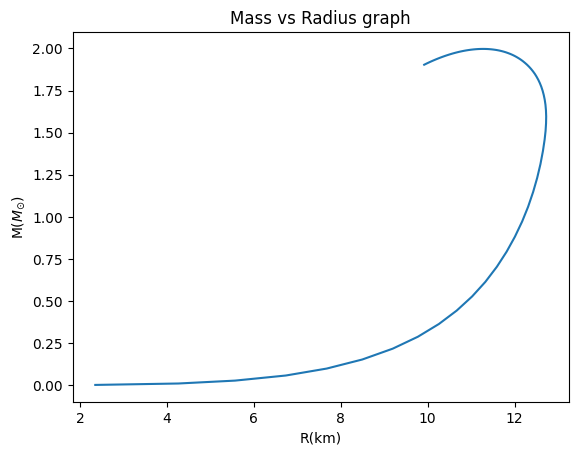

In [18]:
plt.plot(T[1],T[2])
plt.xlabel('R(km)')
plt.ylabel('M($M_{\odot}$)')

plt.title('Mass vs Radius graph')
plt.show()

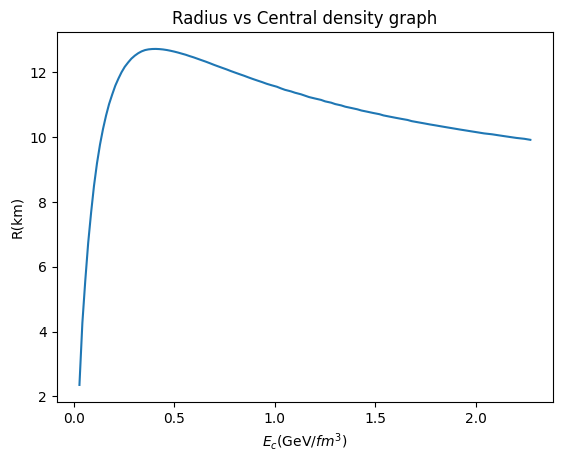

In [19]:
plt.plot(T[3],T[1])
plt.ylabel('R(km)')
plt.xlabel('$E_{c}$(GeV/$fm^{3}$)')

plt.title('Radius vs Central density graph')
plt.show()

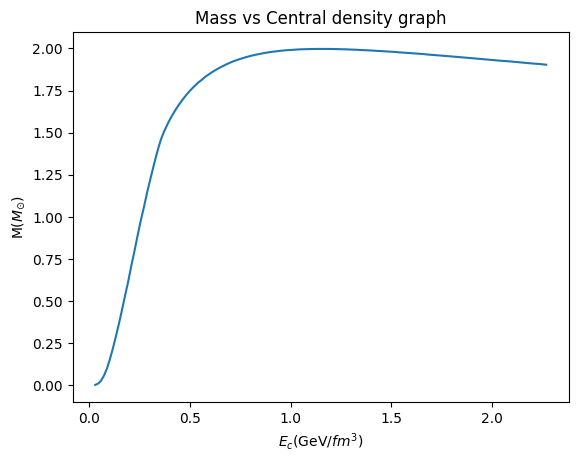

In [20]:
plt.plot(T[3],T[2])
plt.ylabel('M($M_{\odot}$)')
plt.xlabel('$E_{c}$(GeV/$fm^{3}$)')

plt.title('Mass vs Central density graph')
plt.show()